Imports...

In [9]:
from astropy.coordinates import PhysicsSphericalRepresentation
from astropy.io import fits
from astropy import units as u
from astropy.wcs import WCS
from matplotlib import pyplot as plt
import numpy as np
from scipy import interpolate
import ligo.skymap.io
import ligo.skymap.plot

Read Swift BAT FOV and plot it...

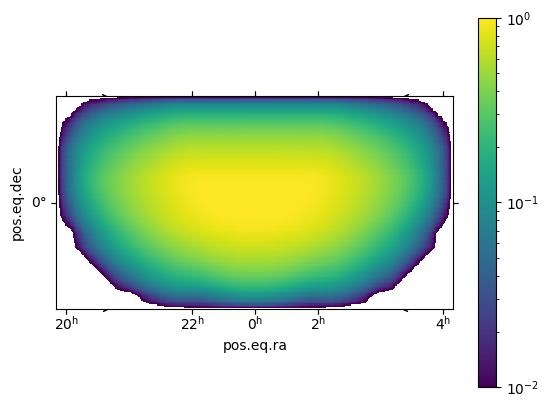

In [2]:
hdu, = fits.open('https://swift.gsfc.nasa.gov/proposals/bat_cal/pcode_default.img')
wcs = WCS(hdu.header)

ax = plt.axes(projection=wcs)
plt.colorbar(ax.imshow(hdu.data, norm='log', origin='lower', vmin=1e-2, vmax=1))

Fit low-order spline to FOV and plot it...

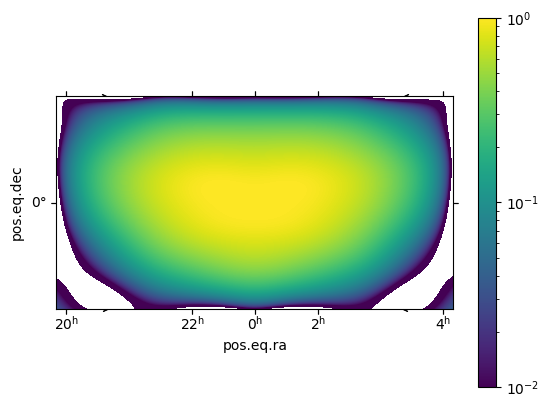

In [3]:
ni, nj = wcs.array_shape
i, j = np.meshgrid(np.arange(ni), np.arange(nj), indexing='ij')
coords = wcs.array_index_to_world(i, j).represent_as(PhysicsSphericalRepresentation)
spline = interpolate.SmoothSphereBivariateSpline(
    coords.ravel()[::2].theta.rad,
    coords.ravel()[::2].phi.rad, hdu.data.ravel()[::2],
    s=50)

ax = plt.axes(projection=wcs)
approx = spline(coords.theta.rad, coords.phi.rad, grid=False)
plt.colorbar(ax.imshow(approx, norm='log', origin='lower', vmin=1e-2, vmax=1))

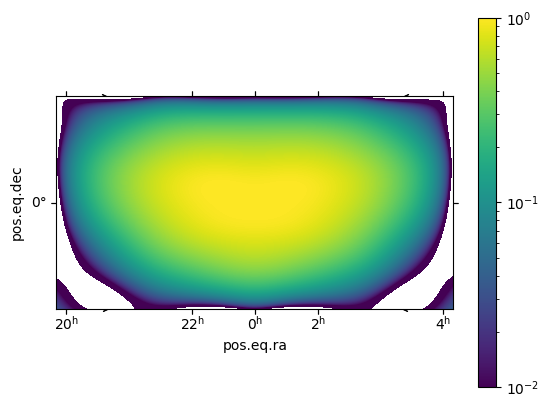

In [4]:
ax = plt.axes(projection=wcs)
approx = spline(coords.theta.rad, coords.phi.rad, grid=False)
plt.colorbar(ax.imshow(approx, norm='log', origin='lower', vmin=1e-2, vmax=1))

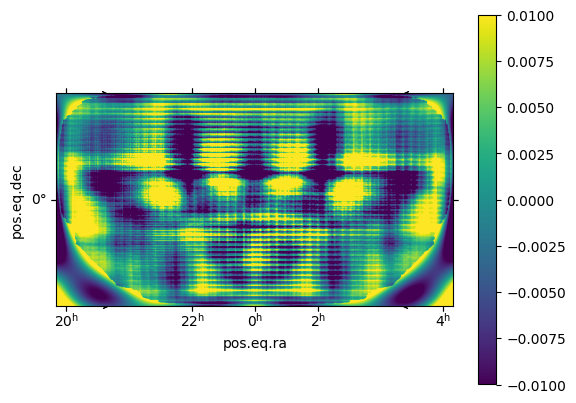

In [5]:
ax = plt.axes(projection=wcs)
approx = spline(coords.theta.rad, coords.phi.rad, grid=False)
plt.colorbar(ax.imshow((approx - hdu.data.data), origin='lower', vmin=-.01, vmax=.01))

Load a GW sky map and plot it...

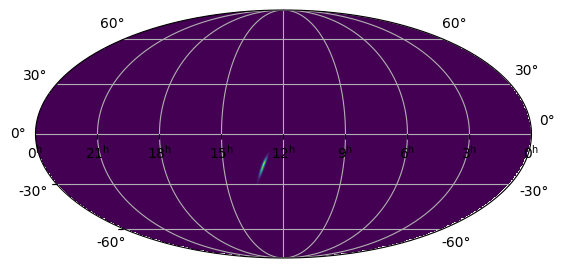

In [10]:
skymap, _ = ligo.skymap.io.read_sky_map('https://emfollow.docs.ligo.org/userguide/_static/bayestar.multiorder.fits')

ax = plt.axes(projection='astro hours mollweide')
ax.imshow_hpx(skymap, cmap='cylon')
ax.grid()

# TODO:

1. Write function to determine time to slew between two orientations, assuming a maximum angular rate and a maximum angular acceleration
2. Given an ephemeris and orientation of Swift, mask out the part of the GW probability map that is outside of the field of regard due to the Earth and Sun
3. Convolve the masked sky map with the BAT FOV (result is a function of ra, dec, roll)
4. Find the position on the sky with the maximum detection probability.
5. Bonus: Note that Swift can observe *while* it is slewing, so Swift need not *land* on the desired pointing before merger; it is sufficient if, at the time of merger, Swift *passes over* the true sky position of the source.